<a href="https://colab.research.google.com/github/shivi0701/ML_projects/blob/shivi/FaceRegonition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib
from matplotlib import pyplot as plt

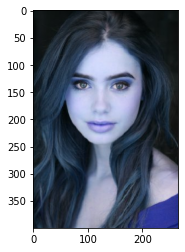

In [71]:
img= cv2.imread('/content/lily collins.jpg')
plt.imshow(img)

In [72]:
gray= cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
gray

array([[ 19,  19,  19, ...,  17,  17, 255],
       [ 19,  19,  19, ...,  17,  17, 255],
       [ 20,  20,  20, ...,  17,  17, 255],
       ...,
       [ 37,  32,  28, ...,  79,  76, 252],
       [ 39,  32,  28, ...,  67,  67, 251],
       [ 41,  33,  27, ...,  56,  59, 249]], dtype=uint8)

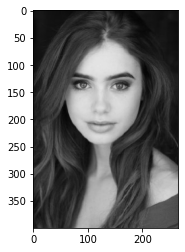

In [73]:
plt.imshow(gray,cmap='gray')

In [74]:
face_cas = cv2.CascadeClassifier ('/content/haarcascade_frontalface_alt.xml')
eye_cas = cv2.CascadeClassifier ('/content/haarcascade_eye.xml')
smile_cas= cv2.CascadeClassifier('/content/haarcascade_smile.xml')
faces = face_cas.detectMultiScale (gray,scaleFactor=1.3, minNeighbors=4)
faces

array([[ 40,  70, 175, 175]], dtype=int32)

In [75]:
x,y,w,h = faces[0]
x,y,w,h

(40, 70, 175, 175)

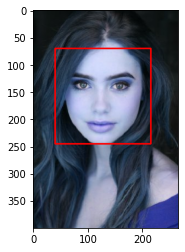

In [77]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

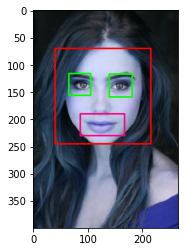

In [80]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cas.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    smile = smile_cas.detectMultiScale(roi_gray,1.5,20) 
    for (x_smile, y_smile, w_smile, h_smile) in smile:
            cv2.rectangle(roi_color,(x_smile, y_smile),(x_smile+w_smile, y_smile+h_smile), (255, 0, 130), 2)
plt.imshow(face_img,cmap='gray')
plt.show()

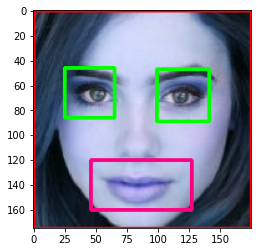

In [81]:
plt.imshow(roi_color,cmap='gray')

In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc


**Wavelet transform**

In [82]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

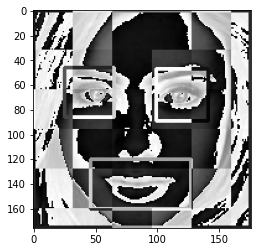

In [83]:
cropped_img = np.array(roi_color)
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [88]:
def get_cropped_image_if_2_eyes_and_a_smile (image_path):
    img = cv2.imread(image_path)
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = img
    faces = face_cas.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
#         img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        smile = smile_cas.detectMultiScale(roi_gray)
        eyes = eye_cas.detectMultiScale(roi_gray)
#         for (ex,ey,ew,eh) in eyes:
#             cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        if(len(eyes) >= 2):
            return roi_color

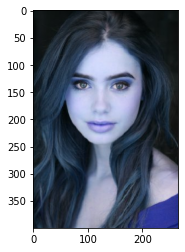

In [89]:
original_image = cv2.imread('/content/lily collins.jpg')
plt.imshow(original_image)

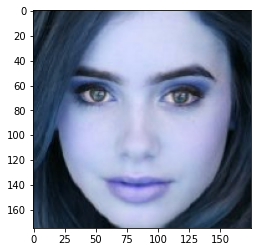

In [90]:
cropped_image = get_cropped_image_if_2_eyes_and_a_smile('/content/lily collins.jpg')
plt.imshow(cropped_image)

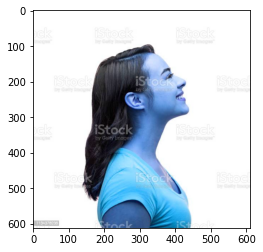

In [91]:
original_image = cv2.imread('/content/girl2.jpg')
plt.imshow(original_image)
plt.show()

In [96]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes_and_a_smile('/content/girl2.jpg')
cropped_image_no_2_eyes  # not returning anything because eyes < 2

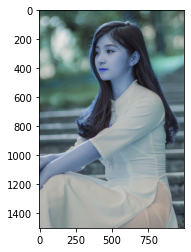

In [93]:
original_image = cv2.imread('/content/pexels-photo.webp')
plt.imshow(original_image)
plt.show()

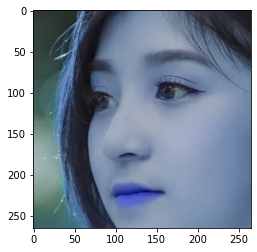

In [99]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes_and_a_smile('/content/pexels-photo.webp')
plt.imshow(cropped_image_no_2_eyes)  # not returning anything because eyes < 2

In [153]:
path_to_data = "/content/drive/MyDrive/archive/train"
path_to_crop_data = "/content/drive/MyDrive/archive/cropped_photos"

In [154]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
#     print(entry)
    if entry.is_dir():
        img_dirs.append(entry.path)

In [155]:
img_dirs

['/content/drive/MyDrive/archive/train/ben_afflek',
 '/content/drive/MyDrive/archive/train/elton_john',
 '/content/drive/MyDrive/archive/train/jerry_seinfeld',
 '/content/drive/MyDrive/archive/train/madonna',
 '/content/drive/MyDrive/archive/train/mindy_kaling']

In [156]:
import shutil
if os.path.exists(path_to_crop_data):
    shutil.rmtree(path_to_crop_data)
os.mkdir(path_to_crop_data)

In [157]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_crop_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  /content/drive/MyDrive/archive/cropped_photosben_afflek
Generating cropped images in folder:  /content/drive/MyDrive/archive/cropped_photosjerry_seinfeld
Generating cropped images in folder:  /content/drive/MyDrive/archive/cropped_photosmadonna
Generating cropped images in folder:  /content/drive/MyDrive/archive/cropped_photosmindy_kaling


In [158]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'cropped_photosben_afflek': ['/content/drive/MyDrive/archive/cropped_photosben_afflek/ben_afflek1.png',
  '/content/drive/MyDrive/archive/cropped_photosben_afflek/ben_afflek2.png',
  '/content/drive/MyDrive/archive/cropped_photosben_afflek/ben_afflek3.png',
  '/content/drive/MyDrive/archive/cropped_photosben_afflek/ben_afflek4.png',
  '/content/drive/MyDrive/archive/cropped_photosben_afflek/ben_afflek5.png',
  '/content/drive/MyDrive/archive/cropped_photosben_afflek/ben_afflek6.png'],
 'cropped_photosjerry_seinfeld': ['/content/drive/MyDrive/archive/cropped_photosjerry_seinfeld/jerry_seinfeld1.png',
  '/content/drive/MyDrive/archive/cropped_photosjerry_seinfeld/jerry_seinfeld2.png',
  '/content/drive/MyDrive/archive/cropped_photosjerry_seinfeld/jerry_seinfeld3.png',
  '/content/drive/MyDrive/archive/cropped_photosjerry_seinfeld/jerry_seinfeld4.png',
  '/content/drive/MyDrive/archive/cropped_photosjerry_seinfeld/jerry_seinfeld5.png',
  '/content/drive/MyDrive/archive/cropped_photosjerr

In [159]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped_photosben_afflek': 0,
 'cropped_photosjerry_seinfeld': 1,
 'cropped_photosmadonna': 2,
 'cropped_photosmindy_kaling': 3}

In [160]:
x, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [161]:
len(x[0])

4096

In [162]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(43, 4096)

In [163]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.8181818181818182

In [165]:
print(classification_report(y_test, pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         2
           2       1.00      1.00      1.00         1
           3       1.00      0.86      0.92         7

    accuracy                           0.82        11
   macro avg       0.62      0.71      0.65        11
weighted avg       0.82      0.82      0.80        11



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [166]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [167]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [168]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.690476,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
1,random_forest,0.561905,{'randomforestclassifier__n_estimators': 1}
2,logistic_regression,0.619048,{'logisticregression__C': 1}


In [169]:
best_estimators

{'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=1))]),
 'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=1, gamma='auto', probability=True))])}

In [171]:
best_estimators['svm'].score(x_test,y_test)

0.8181818181818182

In [172]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8181818181818182

In [173]:
best_estimators['random_forest'].score(x_test,y_test)

0.2727272727272727

In [174]:
best_clf = best_estimators['logistic_regression']

In [175]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[1, 0, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 6]])

In [178]:
best_clf1 = best_estimators['svm']

In [179]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf1.predict(x_test))
cm

array([[0, 1, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 6]])